In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import geopandas as gpd
 
from weavingspace import WeaveUnit
from weavingspace import Tiling

from weavingspace import tiling_utils

import shapely.affinity as affine

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Triaxial weave

/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


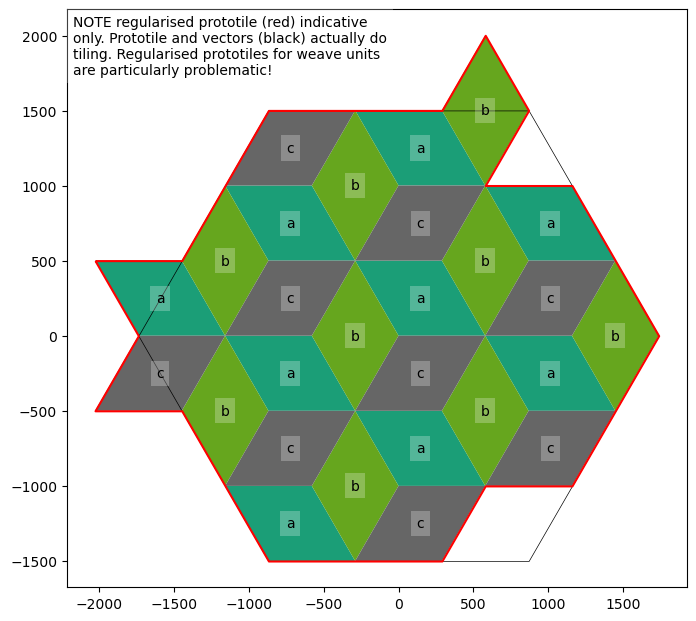

In [3]:
w2_a1 = WeaveUnit(
  # weave_type = "twill", n = 2, spacing = 100, aspect = .8,
  # strands = "ab|cd", crs = ak.crs).transform_rotate(0).inset_tiles(0)
  weave_type = "cube", spacing = 501, aspect = 1,
  strands = "a|b|c", crs = ak.crs).transform_rotate(0).inset_tiles(0)
ax = w2_a1.plot(r = 0, figsize = (8, 8), show_reg_prototile = True, 
                show_ids = True)

In [4]:
print(w2_a1.tiles.geometry[0])

POLYGON ((-578.50497 1002, -289.252485 501, -867.757455 501, -1157.009939 1002, -578.50497 1002))
